# Analysis 3
- Perform head2head performance analysis between top 3 teams
- compare head2head analysis between any two teams
- identify number of matches won, lost and draw between any two teams

In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? 
Nothing done.


In [2]:
%matplotlib inline

In [3]:
import glob
import json
import datetime
import os
#import fnmatch
import csv
import pandas as pd
import numpy as np
from geopy.geocoders import Nominatim
from io import StringIO
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [4]:
directory="Data/Football/Head2Head/Head2HeadByFixture"
count=0
match_dic = {}
match_head2head_df = pd.DataFrame(columns = ['team1','team2','matchCount','team1win','team2win','draw'])
count=0
for root, dirs, files in os.walk(directory):
     for file in files:
        with open(os.path.join(root, file), "r") as f:
            data = json.load(f)
            team1=data['fixture']['homeTeamName']
            team2=data['fixture']['awayTeamName']
            team1win= data['head2head']['homeTeamWins']
            team2win= data['head2head']['awayTeamWins']
            draw=data['head2head']['draws']
            matchCount=data['head2head']['count']
            match_head2head_df.loc[count]=[team1,team2,matchCount,team1win,team2win,draw]
            count+=1            

            

In [13]:
#match_head2head_df[['matchCount','team1win','team2win','draw']].astype(int,copy=False)
match_head2head_df.tail(70)


,team1,team2,matchCount,team1win,team2win,draw
120,AFC Bournemouth,Tottenham Hotspur FC,4.0,0.0,3.0,1.0
121,Arsenal FC,Tottenham Hotspur FC,47.0,18.0,8.0,21.0
122,Aston Villa FC,Tottenham Hotspur FC,47.0,14.0,20.0,13.0
123,Chelsea FC,Tottenham Hotspur FC,48.0,25.0,5.0,18.0
124,Crystal Palace FC,Tottenham Hotspur FC,13.0,3.0,6.0,4.0
125,Everton FC,Tottenham Hotspur FC,48.0,8.0,21.0,19.0
126,Leicester City FC,Tottenham Hotspur FC,21.0,9.0,7.0,5.0
127,Liverpool FC,Tottenham Hotspur FC,48.0,22.0,12.0,14.0
128,Manchester City FC,Tottenham Hotspur FC,38.0,11.0,21.0,6.0
129,Manchester United FC,Tottenham Hotspur FC,47.0,31.0,6.0,10.0


In [17]:
team2='Arsenal FC'
team1='Tottenham Hotspur FC'

match_head2head_df_copy=match_head2head_df.copy() 
values=match_head2head_df_copy.loc[(((match_head2head_df_copy['team1']== team1)|(match_head2head_df_copy['team2']== team1))
                                            &(( match_head2head_df_copy['team2']==team2)|( match_head2head_df_copy['team1']==team2)))][['team1','team2','team1win','team2win','draw']]#.rename(columns = {'team1win':team1+' Win','team2win':team2+' Win',}).astype(int)
#l= values.tolist()
print(values['team1'].tolist(), team1)
if team1 == values['team1'].tolist()[0]:
    print('Hi')
else:
    print('hii')
values

    #print(values['team1'].to_string())
#if team1 in match_head2head_df_copy['team2']:
 #   values.rename(columns = {'team1win':team2+' Win','team2win':team1+' Win',}).astype(int)
#else:
  #  values.rename(columns = {'team1win':team1+' Win','team2win':team2+' Win',}).astype(int)

#.rename(columns = {'team1win':team1+' Win','team2win':team2+' Win',}).astype(int)
#print(values)
#val_ser=values.stack()
#data_val_df=val_ser.to_frame().reset_index().rename(columns = {'level_1':'Data_Lable',0:'Data_Value',})[['Data_Lable','Data_Value']]


['Arsenal FC'] Tottenham Hotspur FC
hii


,team1,team2,team1win,team2win,draw
121,Arsenal FC,Tottenham Hotspur FC,18.0,8.0,21.0


In [7]:
t1=list(match_head2head_df['team1'].unique())
team1 = widgets.Dropdown(options=t1,value=t1[3],description='Select Team1:',)
#team1.observe(on_change, t1)
t2= list(match_head2head_df['team1'].unique())
#list(match_head2head_df[match_head2head_df['team1'] team1]['team1'].unique())
team2=  widgets.Dropdown(options=t2,value=t2[4],description='Select Team2:',)
                                  
def plotit(team1,team2):
    if team1!=team2:
    #print(team1,team2)
        match_head2head_df_copy=match_head2head_df.copy()    
        #print(match_head2head_df_copy[(match_head2head_df_copy['team1']==team1)& ( match_head2head_df_copy['team2']==team2)])
        values=match_head2head_df_copy.loc[(((match_head2head_df_copy['team1']== team1)|(match_head2head_df_copy['team2']== team1))
                                            &(( match_head2head_df_copy['team2']==team2)|( match_head2head_df_copy['team1']==team2)))][['team1win','team2win','draw']].rename(columns = {'team1win':team1+' Win','team2win':team2+' Win',}).astype(int)
        #print(values)
        val_ser=values.stack()
        data_val_df=val_ser.to_frame().reset_index().rename(columns = {'level_1':'Data_Lable',0:'Data_Value',})[['Data_Lable','Data_Value']]
        colors=["#5151CC", "#FFC200", "#939393"]
        #print(data_val_df)
        
        plt.figure(1, figsize=(6,6)) 
        ax = plt.axes([0.1, 0.1, 0.8, 0.8]) 
        labels = data_val_df['Data_Lable']
        fracs = data_val_df['Data_Value'] 
        total = sum(fracs) 
        explode=(0.05, 0.05, 0.05) 
        plt.pie(fracs, explode=explode,colors=colors, labels=labels, autopct= lambda p: '{:.0f}'.format(p * total / 100), shadow=True, startangle=90) 
        plt.show()
    else:
        print("Please select two different teams")
#data_val_df





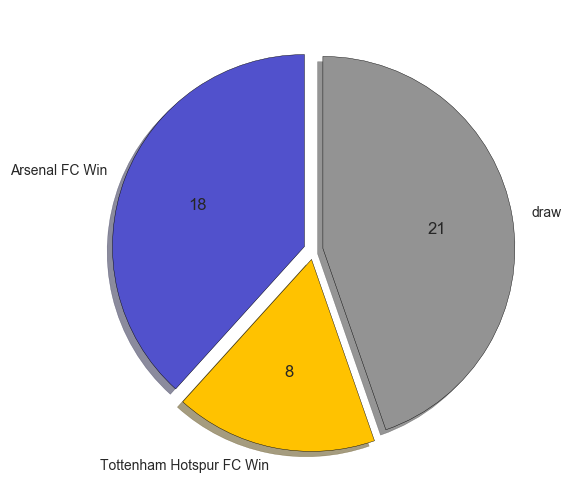

In [8]:

interactive(plotit, team1=team1,team2=team2,)